In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats


ModuleNotFoundError: No module named 'seaborn'

# Metoda najmniejszych kwadratów

### Idea

**Cel:** Znaleźć najlepszą linię prostą $y = ax + b$ do danych

**Jak?** Minimalizując sumę **kwadratów odchyleń** punktów od linii

$$\text{Minimalizuj: } SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2 = \sum_{i=1}^{n}(y_i - (ax_i + b))^2$$

gdzie:
- $y_i$ = rzeczywista wartość
- $\hat{y}_i = ax_i + b$ = wartość przewidziana przez model
- $(y_i - \hat{y}_i)$ = **residual** (reszta, błąd)

---

### Dlaczego kwadraty?

✅ **Zalety kwadratów:**
- Błędy dodatnie i ujemne się nie znoszą
- Większe kary za duże odchylenia
- Matematycznie wygodne (funkcja różniczkowalna)
- Rozwiązanie analityczne istnieje!

**Wzory na parametry:**
$$a = \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{\sum(x_i - \bar{x})^2}$$

$$b = \bar{y} - a\bar{x}$$

In [ ]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})


slope, intercept, r_value, p_value, std_err = stats.linregress(data.x, data.y)
print(f"slope: {slope:.2f}, intercept: {intercept:.2f}")
fig, ax = plt.subplots()
data.plot(kind="scatter", x='x', y='y', ax=ax)
y_linreg = slope*x + intercept
ax.plot(x, y_linreg, 'r--')

In [ ]:
# Ustawienie seed dla powtarzalności
np.random.seed(42)

# Generowanie danych: y ≈ 2x + 5 + szum
n = 50
x = np.linspace(0, 10, n)
y_true = 2 * x + 5  # prawdziwa zależność
noise = np.random.normal(0, 2, n)  # losowy szum
y = y_true + noise

# Stworzenie DataFrame
data = pd.DataFrame({'x': x, 'y': y})

# Wykres z dopasowaniem linii prostej
sns.lmplot(data=data, x='x', y='y', height=6, aspect=1.5)
plt.title('Metoda najmniejszych kwadratów: y ≈ 2x + 5')
plt.show()

# Metoda najmniejszych kwadratów metodą macierzową

In [ ]:
# Dane wejściowe: godziny nauki (x) i wyniki testu (y)
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 4, 5, 4, 5])

# Tworzenie macierzy projektującej X (dodajemy kolumnę jedynek)
X = np.vstack((x, np.ones(len(x)))).T

# Obliczanie współczynników metodą najmniejszych kwadratów
# beta = (X^T X)^(-1) X^T y
beta = np.linalg.inv(X.T @ X) @ X.T @ y

# Wyodrębnienie parametrów a (nachylenie) i b (wyraz wolny)
a, b = beta

print(f"Nachylenie (a): {a}")
print(f"Wyraz wolny (b): {b}")

# Rysowanie wykresu danych i dopasowanej linii regresji
plt.scatter(x, y, color='blue', label='Dane')
plt.plot(x, a * x + b, color='red', label='Linia regresji')
plt.xlabel('Godziny nauki')
plt.ylabel('Wynik z testu')
plt.legend()
plt.title('Metoda najmniejszych kwadratów - Regresja liniowa')
plt.show()

In [ ]:
# Obliczanie reszt (błędów) modelu
residuals = y - (a * x + b)

# Obliczanie wariancji reszt
residual_variance = np.var(residuals, ddof=2)

# Obliczanie macierzy kowariancji parametrów
XTX_inv = np.linalg.inv(X.T @ X)
param_covariance_matrix = residual_variance * XTX_inv

# Błędy standardowe parametrów a i b
param_errors = np.sqrt(np.diag(param_covariance_matrix))

error_a, error_b = param_errors

error_a, error_b

In [ ]:
# Obliczanie współczynnika korelacji Pearsona z macierzy projektującej X i wektora y
# Współczynnik korelacji Pearsona: r = cov(X, y) / (std(X) * std(y))

# Obliczanie średnich
mean_x = np.mean(x)
mean_y = np.mean(y)

# Obliczanie kowariancji
cov_xy = np.sum((x - mean_x) * (y - mean_y)) / (len(x) - 1)

# Obliczanie odchyleń standardowych
std_x = np.std(x, ddof=1)
std_y = np.std(y, ddof=1)

# Obliczanie współczynnika korelacji Pearsona
pearson_coefficient = cov_xy / (std_x * std_y)

pearson_coefficient

# Zadanie 1

Wykorzystując `np.random.normal`, wygeneruj dane testowe (1000 punktów na płaszczyźnie w zależnosci liniowej między x i y) , do których zastosuj metodę najmniejszych kwadratów (możesz użyć **stats.linregres, scipy.optimize.curve_fit, numpy.polyfit**).
- Znajdź parametry prostej $y = a \cdot x + b$ .


In [2]:
np.random.seed(42) 


a_true = 2.5
b_true = -1.0

x = np.random.normal(0, 5, 1000)
noise = np.random.normal(0, 2, 1000)
y = a_true * x + b_true + noise

# Zadanie 2

Wczytaj dane z pliku **LungDisease.csv** do DataFrame za pomocą biblioteki `pandas`. Dane te zawierają informacje o liczbie lat, przez które pracownik był narażony na pył bawełniany (**Exposure**), oraz o miarze pojemności płuc (**PEFR** - szczytowy przepływ wydechowy).

- Następnie, używając biblioteki matplotlib lub seaborn, stwórz wykres punktowy, na którym na osi x znajdzie się zmienna **Exposure**, a na osi y zmienna **PEFR**.

- Po stworzeniu wykresu, oblicz współczynnik korelacji Pearsona między **Exposure** a **PEFR**, aby ilościowo określić siłę i kierunek zależności między tymi zmiennymi.

- Na koniec, dopasuj prostą regresji liniowej do danych, aby zobaczyć, jak **PEFR** zmienia się w zależności od **Exposure**. Wyświetl wykres z dopasowaną prostą regresji

- Zastanów się, czy na wykresie punktowym widać wyraźny trend lub wzorzec. Czy PEFR rośnie czy maleje wraz z Exposure? Czy są jakieś odstające punkty lub nietypowe dane?

In [9]:
df = pd.read_csv("LungDisease.csv")

print(df.head())
print(df.describe())

   PEFR  Exposure
0   390         0
1   410         0
2   430         0
3   460         0
4   420         1
             PEFR    Exposure
count  122.000000  122.000000
mean   365.655738   14.081967
std    105.132641    6.959850
min    110.000000    0.000000
25%    300.000000    7.000000
50%    365.000000   17.000000
75%    430.000000   20.000000
max    610.000000   23.000000


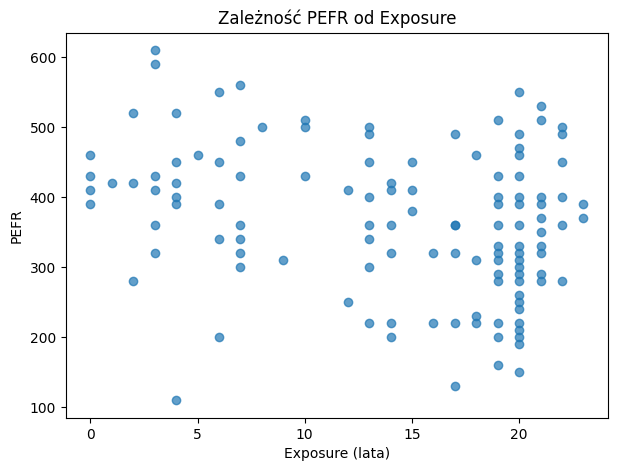

In [7]:
plt.figure(figsize=(7, 5))
plt.scatter(df["Exposure"], df["PEFR"], alpha=0.7)
plt.xlabel("Exposure (lata)")
plt.ylabel("PEFR")
plt.title("Zależność PEFR od Exposure")
plt.show()

In [12]:
%pip install scipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 20.0 MB/s  0:00:01m0:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [14]:
from scipy.stats import pearsonr

r, p_value = pearsonr(df["Exposure"], df["PEFR"])

print("Współczynnik korelacji Pearsona r =", r)
print("p-value =", p_value)

Współczynnik korelacji Pearsona r = -0.2770217010684073
p-value = 0.0020083520333510196


In [18]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


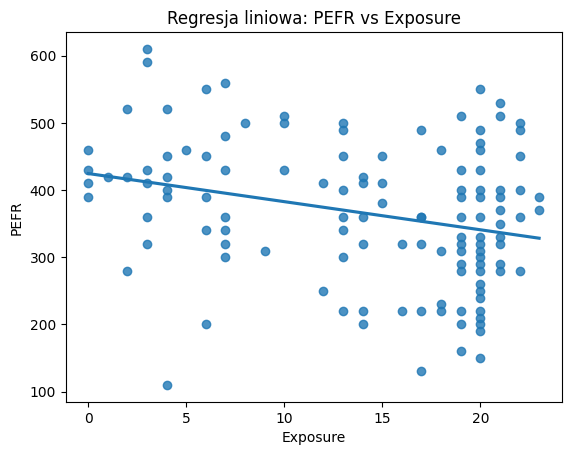

In [20]:
import seaborn as sns

sns.regplot(data=df, x="Exposure", y="PEFR", ci=None)
plt.title("Regresja liniowa: PEFR vs Exposure")
plt.show()

# Zadanie 3

1. **Wczytaj dane:**
   - Wczytaj dane z pliku `anscombe.csv` do DataFrame za pomocą biblioteki `pandas`.
   - Przekształć dane, aby miały format:

     ```
         x1    y1    x2    y2    x3     y3   x4    y4
     0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
     1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
     ```

2. **Stwórz wykresy punktowe:**
   - Użyj biblioteki `matplotlib` lub `seaborn`, aby stworzyć wykresy.
   - Na każdej osi (`ax`) umieść wykres punktowy dla par `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.

3. **Dopasuj funkcje liniowe:**
   - Dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4` dopasuj funkcję liniową w postaci $y = a \cdot x + b$.
   - Oblicz współczynniki `a` i `b` wraz z błędami dla każdej pary.

4. **Oblicz współczynnik korelacji:**
   - Oblicz współczynnik korelacji Pearsona dla każdej pary `x1, y1`, `x2, y2`, `x3, y3` oraz `x4, y4`.



In [34]:
import pandas as pd

df = pd.read_csv(
    "anscombe.csv",
    skiprows=2,
    header=None,
    names=["x1","y1","x2","y2","x3","y3","x4","y4"]
)


df = df.astype(float)

print(df.head())
print(df.dtypes)

     x1    y1    x2    y2    x3     y3   x4    y4
0  10.0  8.04  10.0  9.14  10.0   7.46  8.0  6.58
1   8.0  6.95   8.0  8.14   8.0   6.77  8.0  5.76
2  13.0  7.58  13.0  8.74  13.0  12.74  8.0  7.71
3   9.0  8.81   9.0  8.77   9.0   7.11  8.0  8.84
4  11.0  8.33  11.0  9.26  11.0   7.81  8.0  8.47
x1    float64
y1    float64
x2    float64
y2    float64
x3    float64
y3    float64
x4    float64
y4    float64
dtype: object


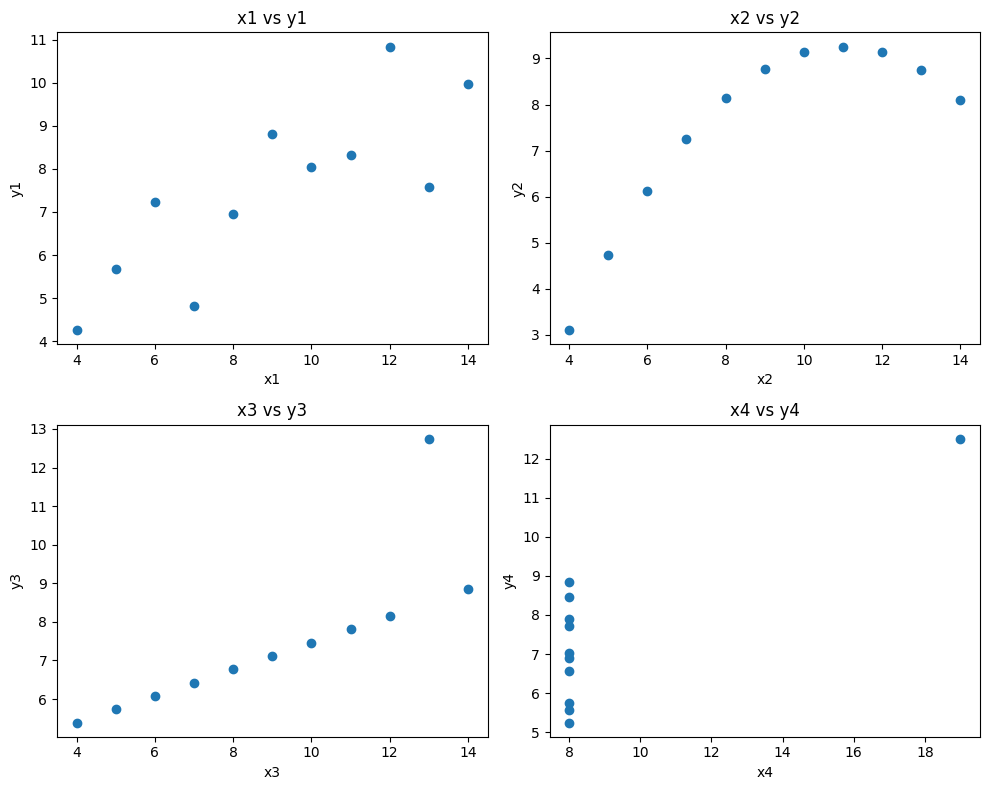

In [35]:
pairs = [("x1","y1"), ("x2","y2"), ("x3","y3"), ("x4","y4")]

fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (x_col, y_col) in zip(axes.flatten(), pairs):
    ax.scatter(df[x_col], df[y_col])
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{x_col} vs {y_col}")

plt.tight_layout()
plt.show()

In [36]:
for x_col, y_col in pairs:
    params, cov = np.polyfit(df[x_col].values, df[y_col].values, 1, cov=True)
    a, b = params
    a_err, b_err = np.sqrt(np.diag(cov))

    print(x_col, y_col)
    print("a =", round(a,3), "+/-", round(a_err,3))
    print("b =", round(b,3), "+/-", round(b_err,3))
    print()

x1 y1
a = 0.5 +/- 0.118
b = 3.0 +/- 1.125

x2 y2
a = 0.5 +/- 0.118
b = 3.001 +/- 1.125

x3 y3
a = 0.5 +/- 0.118
b = 3.002 +/- 1.124

x4 y4
a = 0.5 +/- 0.118
b = 3.002 +/- 1.124



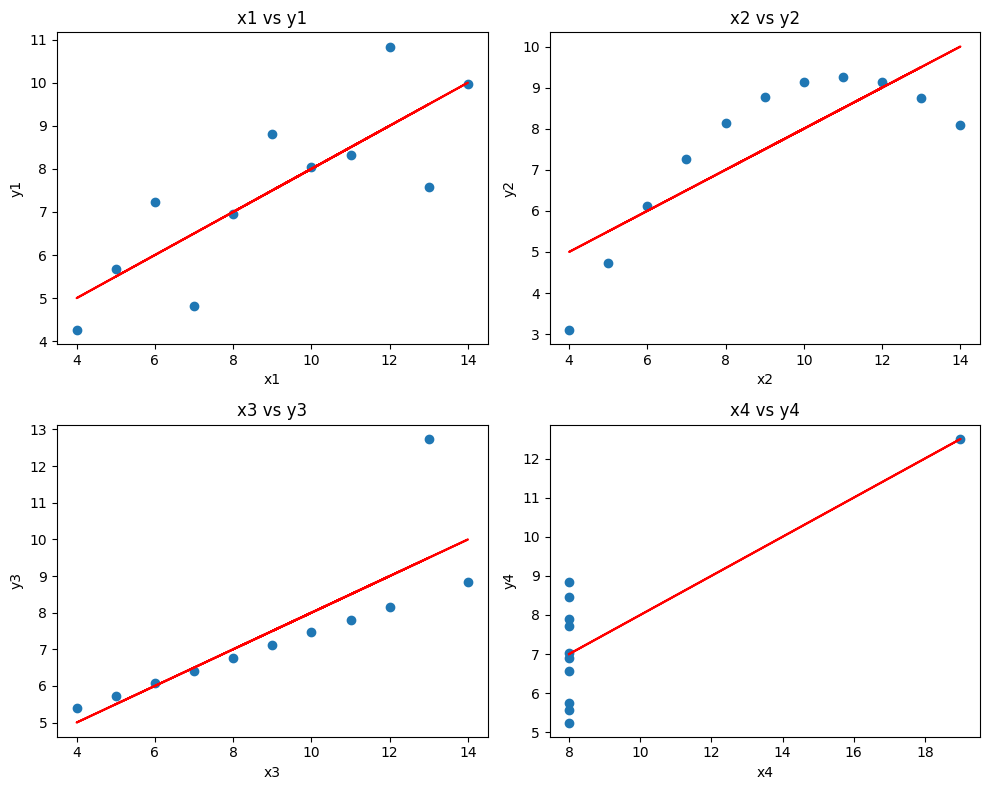

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for ax, (x_col, y_col) in zip(axes.flatten(), pairs):
    x = df[x_col]
    y = df[y_col]
    a, b = np.polyfit(x, y, 1)

    ax.scatter(x, y)
    ax.plot(x, a*x + b, color="red")
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_title(f"{x_col} vs {y_col}")

plt.tight_layout()
plt.show()

In [38]:
for x_col, y_col in pairs:
    r = df[x_col].corr(df[y_col])
    print(x_col, y_col, "r =", round(r,3))

x1 y1 r = 0.816
x2 y2 r = 0.816
x3 y3 r = 0.816
x4 y4 r = 0.817
